In [1]:
%load_ext autoreload
%autoreload 2

# Add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Import the rest of our modules
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Import py files
from src import cm_class_LRM as LRM # Logistic Regression Model Class
from src import cm_class_KNN as KNN # K-Nearest Neighbor Model Class

# Create paths to folders in repo
data_folder = '../../data/'
figure_folder = '../../src/'

# Import Data

In [3]:
df=pd.read_csv('../../data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- State and area code: location
- phone number: drop
- non-numeric data: state, phone number, international plan, voice mail plan

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### CHECK FOR MISSING DATA

In [5]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### CHECK FOR IMBALANCE
Data looks to be imbalanced, need to consider balancing techniques
- SMOTE?

In [6]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [7]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

### COLUMN  DATA TYPES
- All numeric other than: state, phone number, international plan and voice mail plan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### ASSIGN OUTCOME CLASSES

In [9]:
# USING SKLEARN LabelEncoder
le = LabelEncoder()

# Assigns binary classes to 'churn' 
# le.fit_transform(df['churn'])
df['target'] = le.fit_transform(df['churn'])

# Class 0 is index 0 in this array: False 
# Class 1 is index 1 in this array: True
print(le.classes_)

df.head()

[False  True]


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,target
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


### SET X AND y

In [10]:
X = df[['account length','total night calls','number vmail messages','total day minutes','total day charge','total eve minutes']]
y = df.target 

In [11]:
type(X)

pandas.core.frame.DataFrame

# Logistic Regression Modeling

### A. Initial LogReg model

In [12]:
m1_LogReg = LRM.LogRegModel(X, y, random_state=42)

TRAINING DATA RESULTS 

Confusion Matrix
[[2141    0]
 [ 355    3]] 
 ----------------------
Cross Validation Score
0.8579437751004015 
 ----------------------
Precision Recall Score
0.4758900893040541 
 ----------------------
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.001: 0.6287147184915941
-------------------------------------------------------
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.01: 0.6316632701786613

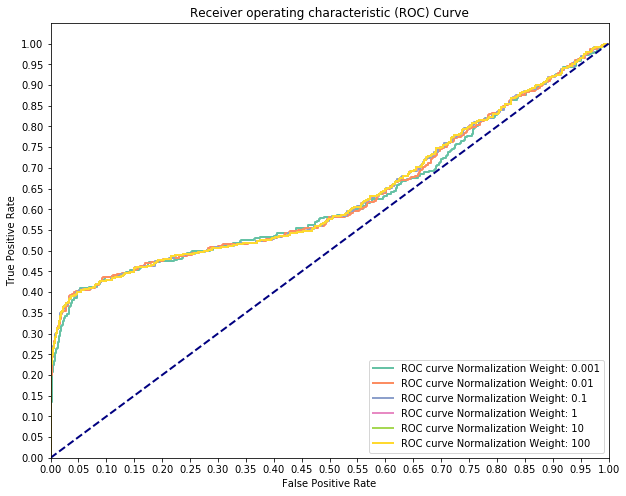

In [13]:
results, coef_, intercept_, m1_LRM_params = m1_LogReg.LRM_model()

In [14]:
m1_LRM_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

# K-Nearest Neighbors

### 1A. Initial KNN model

- MinMaxScaler
- Kfold cross validation

In [15]:
m1_knn = KNN.knnModel(X, y, random_state=42)

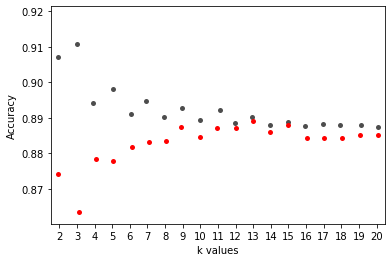

In [16]:
k_scores_train, k_scores_val = m1_knn.KNN_train()

In [17]:
k_scores_train

{2: 0.9071631315657829,
 3: 0.910764432216108,
 4: 0.8942578789394698,
 5: 0.8982596298149075,
 6: 0.8912567283641822,
 7: 0.8947583791895948,
 8: 0.8902564282141071,
 9: 0.8927573786893447,
 10: 0.889455927963982,
 11: 0.8921570785392696,
 12: 0.888655727863932,
 13: 0.8901561780890445,
 14: 0.8879553276638319,
 15: 0.8888554777388695,
 16: 0.8877551775887944,
 17: 0.888255427713857,
 18: 0.887955227613807,
 19: 0.8881552776388194,
 20: 0.8874550775387693}

In [18]:
k_scores_val

{2: 0.8743543086172345,
 3: 0.8635478957915831,
 4: 0.878353507014028,
 5: 0.8779543086172344,
 6: 0.8819591182364729,
 7: 0.8831583166332665,
 8: 0.883559118236473,
 9: 0.8875575150300602,
 10: 0.8847575150300602,
 11: 0.8871567134268536,
 12: 0.8871583166332666,
 13: 0.8891583166332666,
 14: 0.8859583166332665,
 15: 0.8879575150300602,
 16: 0.8843567134268537,
 17: 0.8843543086172344,
 18: 0.8843559118236474,
 19: 0.8851551102204409,
 20: 0.8851567134268536}

#### k = 13 appears to have the best results
##### 13: 0.890, 0.889

### 1B. Hyperparameter Tuning (GridSearchCV)

* 5-fold cross validation,
* (Stratified)KFold

***cv=10:***
- Best leaf_size: 1
- Best p: 2
- Best n_neighbors: 7

***cv=10:***
- Best leaf_size: 1
- Best p: 2
- Best n_neighbors: 17
- 0.864

In [19]:
m1_knn_params = m1_knn.KNN_tune_gridsearch()

Best leaf_size: 1
Best p: 2
Best n_neighbors: 17
0.864


In [20]:
m1_knn_params

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 2,
 'weights': 'uniform'}

### 1C. Model Evaluation